Importing All Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Listing all files present in the current directory

In [ ]:
print(os.listdir())

['.config', 'sample_data']


Code to ignore any warnings to ensure smooth running of code

In [ ]:
warnings.filterwarnings('ignore')

Uploading the bad dataset a.k.a Processed_Heart_Dataset csv file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving processed_heart_data.csv to processed_heart_data.csv


Listing all files in current directory once again

In [ ]:
print(os.listdir())

['.config', 'processed_heart_data.csv', 'sample_data']


Assigning variable data to refer to the csv file

In [ ]:
data = pd.read_csv("processed_heart_data.csv")

Printing the shape of data(rows, cols), the type(datatype) and first five rows of the data in the bad dataset

In [ ]:
print("Shape of data is :", data.shape)
print("Type of data is :", type(data))
print("First 5 rows of data is :\n", data.head())

Shape of data is : (297, 14)
Type of data is : <class 'pandas.core.frame.DataFrame'>
First 5 rows of data is :
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  thal  num  
0   0     6    0  
1   3     3    2  
2   2     7    1  
3   0     3    0  
4   0     3    0  


Providing statistical calculations of data

In [ ]:
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.676768   
std      0.994914   22.9415

Running a check for missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  num       297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


This shows that there are no missing values (all are non-null)



---



**SPLITTING DATA FOR TRAINING AND TESTING**

Spltting Dataset for Training and Testing on 5 different models

Last column i.e. target will be the one checked against all other columns to find algorithm giving best accuracy

In [ ]:
prediction_variable = data.drop("num", axis=1)
target_variable = data["num"]

Data of prediction_variable will be split such that it is 80% for Training, 20% for Testing

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(prediction_variable, target_variable,test_size=0.20,random_state=0)

Shape of each test and train variable

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(237, 13)
(60, 13)
(237,)
(60,)




---



**ALGORITHMS**

**1.** LOGISTIC REGRESSION

In [ ]:
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train, Y_train)
Y_predicted_LogisticRegression = Logistic_Regression.predict(X_test)

Accuracy achieved using Logistic Regression:




In [ ]:
accuracy_LogisticRegression = f"{accuracy_score(Y_predicted_LogisticRegression, Y_test)*100 : .2f}"
print("Accuracy achieved in % using Logistic Regression is :", accuracy_LogisticRegression)

Accuracy achieved in % using Logistic Regression is :  56.67


**2.** NAIVE BAYES

In [ ]:
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train, Y_train)
Y_Predicted_NaiveBayes = Naive_Bayes.predict(X_test)

Accuracy achieved using Naive Bayes

In [ ]:
accuracy_NaiveBayes = f"{accuracy_score(Y_Predicted_NaiveBayes, Y_test)*100 : .2f}"
print("Accuracy achieved in % using Naive Bayes is :", accuracy_NaiveBayes)

Accuracy achieved in % using Naive Bayes is :  51.67


**3.** K Nearest Neighbors

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train, Y_train)
Y_Predicted_KNN = KNN.predict(X_test)

Accuracy achieved using KNN (It reduces as number of neigbors referred to reduces)

In [ ]:
accuracy_KNN = f"{accuracy_score(Y_Predicted_KNN, Y_test)*100 : .2f}"
print("Accuracy achieved in % using KNN is :", accuracy_KNN)

Accuracy achieved in % using KNN is :  51.67


**4.** DECISION TREE

In [ ]:
max_accuracy = 0

for x in range(200):
    Decision_Tree = DecisionTreeClassifier(random_state = x)
    Decision_Tree.fit(X_train,Y_train)
    Y_Predicted_DecisionTree = Decision_Tree.predict(X_test)
    current_accuracy = float(f"{accuracy_score(Y_Predicted_DecisionTree, Y_test)*100 : .2f}")
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)


Decision_Tree = DecisionTreeClassifier(random_state = best_x)
Decision_Tree.fit(X_train,Y_train)
Y_Predicted_DecisionTree = Decision_Tree.predict(X_test)

56.67
57


Accuracy Achieved using Decision Tree

In [ ]:
accuracy_DecisionTree = f"{accuracy_score(Y_Predicted_DecisionTree, Y_test)*100 : .2f}"
print("Accuracy achieved in % using Decision Tree is :", accuracy_DecisionTree)

Accuracy achieved in % using Decision Tree is :  56.67


**5.** RANDOM FOREST

In [ ]:
max_accuracy = 0

for x in range(2000):
    Random_Forest = RandomForestClassifier(random_state=x)
    Random_Forest.fit(X_train,Y_train)
    Y_Predicted_RandomForest = Random_Forest.predict(X_test)
    current_accuracy = float(f"{accuracy_score(Y_Predicted_RandomForest, Y_test)*100 : .2f}")
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)

Random_Forest = RandomForestClassifier(random_state=best_x)
Random_Forest.fit(X_train,Y_train)
Y_Predicted_RandomForest = Random_Forest.predict(X_test)

60.0
17


Accuracy using Random Forest Algorithm

In [ ]:
accuracy_RandomForest = f"{accuracy_score(Y_Predicted_RandomForest, Y_test)*100 : .2f}"
print("Accuracy achieved in % using Random Forest is :", accuracy_RandomForest)

Accuracy achieved in % using Random Forest is :  60.00




---



COMPARISON TO FIND THE BEST ALGORITHM AMONG ALL 5 ALGORITHMS

In [ ]:
Accuracies = [accuracy_LogisticRegression, accuracy_NaiveBayes, accuracy_KNN, accuracy_DecisionTree, accuracy_RandomForest]
Algorithms = ["Logistic Regression", "Naive Bayes", "K Nearest Neigbors", "Decision Tree", "Random Forest"]

for i in range(len(Algorithms)):
  print("Accuracy achieved using", Algorithms[i], "in % is :", Accuracies[i])

Accuracy achieved using Logistic Regression in % is :  56.67
Accuracy achieved using Naive Bayes in % is :  51.67
Accuracy achieved using K Nearest Neigbors in % is :  51.67
Accuracy achieved using Decision Tree in % is :  56.67
Accuracy achieved using Random Forest in % is :  60.00


Plotting a Bar Plot to view Comparison

<Axes: >

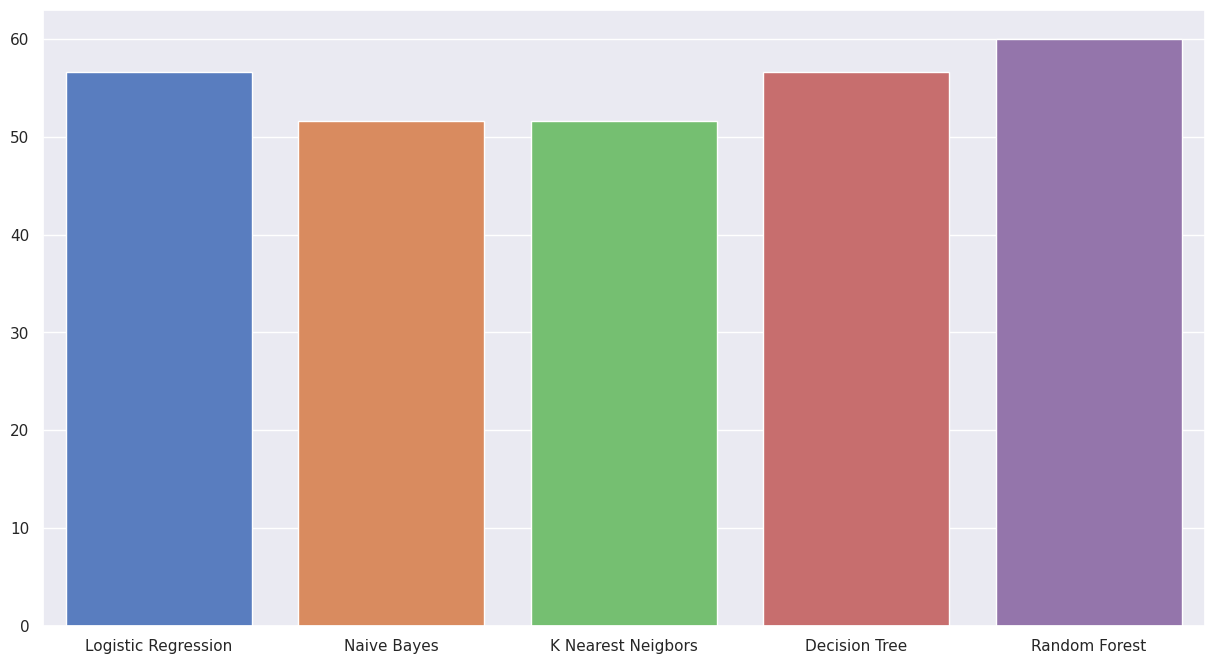

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})

sns.barplot(x=Algorithms, y=Accuracies, palette = "muted")